# Modalités

- Maximum avant le 19 janvier 2025 à 20h.
- Le nombre de point bonus maximal atteignable est de 3 :
  - un point pour la qualité de l'argumentation
  - un point pour la rigueur méthodologique
  - un point pour la performance si la RMSE finale obtenu est inférieure à 1.5 pour un dataset de test composée des 20% date les plus récentes.

# Description du Dataset

Le dataset représente les données de marché pour l'indice VKOSPI, qui est l'équivalent coréen de l'indice de volatilité implicite VIX aux États-Unis. Chaque ligne du dataset correspond à un jour de trading, excluant les week-ends et les jours fériés. Les colonnes du dataset fournissent diverses informations sur les transactions et les positions des options et des futures sur l'indice KOSPI200, qui est l'actif sous-jacent du VKOSPI.

## Description des Colonnes

- Date : La date du jour de trading.
- VKOSPI : La valeur de l'indice de volatilité implicite VKOSPI pour ce jour.
- KOSPI200 : La valeur de l'indice KOSPI200 pour ce jour.
- Open_interest : Le nombre total de contrats d'options ouverts (non réglés) pour ce jour.
- For_KOSPI_Netbuying_Amount : Le montant net acheté par les étrangers pour l'indice KOSPI200, calculé comme (Prix) \* (Quantité).
- For_Future_Netbuying_Quantity : La quantité nette achetée par les étrangers pour les futures de KOSPI200.
- For_Call_Netbuying_Quantity : La quantité nette achetée par les étrangers pour les options d'achat (call) de KOSPI200.
- For_Put_Netbuying_Quantity : La quantité nette achetée par les étrangers pour les options de vente (put) de KOSPI200.
- Indiv_Future_Netbuying_Quantity : La quantité nette achetée par les individus pour les futures de KOSPI200.
- Indiv_Call_Netbuying_Quantity : La quantité nette achetée par les individus pour les options d'achat (call) de KOSPI200.
- Indiv_Put_Netbuying_Quantity : La quantité nette achetée par les individus pour les options de vente (put) de KOSPI200.
- PCRatio : Le ratio Put-Call, qui est le rapport entre le volume des options de vente (put) et le volume des options d'achat (call).
- Day_till_expiration : Le nombre de jours restants jusqu'à la date d'expiration des options.

## Quelques explications de notions financières:

Le KOSPI200 est un indice boursier composé des 200 plus grandes entreprises cotées en Corée du Sud. Il est souvent considéré comme un indicateur de la performance du marché boursier coréen. Un indice similaire au S&P500 pour les États-Unis, l’Euro STOXX 50 l’Europe ou le Nikkei 225 pour le Japon.

La volatilité implicite est une mesure de la volatilité future attendue d'un actif sous-jacent, dérivée des prix des options. Le VKOSPI est l'indice de volatilité implicite pour le marché coréen, comparable au VIX pour le marché américain, VSTOXX pour le marché européen ou VNKY pour le Japon.

L'open interest représente le nombre total de contrats d'options ouverts (non réglés) à une date donnée. C'est une mesure de l'activité de trading et de l'intérêt des investisseurs pour les options.

Le net buying amount ou quantity représente la différence entre les achats et les ventes effectués par un groupe spécifique (étrangers ou individus) pour un actif donné (KOSPI200, futures, options d'achat, options de vente). Un net buying positif indique que les achats dépassent les ventes.

Le ratio Put-Call est le rapport entre le volume des options de vente (put) et le volume des options d'achat (call). Il est utilisé comme indicateur de sentiment de marché. Un ratio élevé peut indiquer une prudence ou une anticipation de baisse des prix.

Une option d'achat (call) donne à son détenteur le droit, mais non l'obligation, d'acheter un actif sous-jacent à un prix prédéterminé (prix d'exercice) avant une date d'expiration donnée.

Une option de vente (put) donne à son détenteur le droit, mais non l'obligation, de vendre un actif sous-jacent à un prix prédéterminé (prix d'exercice) avant une date d'expiration donnée.

Un contrat à terme (future) est un accord pour acheter ou vendre un actif sous-jacent à un prix prédéterminé à une date future spécifiée.

# Objectif

Prédire, en expliquant rigoureusement et clairement la démarche, la valeur du VKOSPI. La métrique de référence sera la RSME, mais à des fins d'analyse d'autres métrique peuvent être discutée. Aucun algorithmes autres que ceux vus en cours et décrit dans le poly ne seront acceptés.


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("options_KR.csv", parse_dates=["Date"], index_col="Date")
# Prendre les Dates comme index pour ...

df["For_KOSPI_Netbuying_Amount"] = df["For_KOSPI_Netbuying_Amount"].apply(
    lambda x: int(float(x))
)
# tranformer les valeurs de forme "-1.090000e+11" en entier


predictors = df.columns[1:].tolist()
df.head()

,VKOSPI,KOSPI200,Open_interest,For_KOSPI_Netbuying_Amount,For_Future_Netbuying_Quantity,For_Call_Netbuying_Quantity,For_Put_Netbuying_Quantity,Indiv_Future_Netbuying_Quantity,Indiv_Call_Netbuying_Quantity,Indiv_Put_Netbuying_Quantity,PCRatio,Day_till_expiration,Day_of_a_week
Date,,,,,,,,,,,,,
2009-06-02,33.45,180.90,4377777,494000000000,-4953,-24646,6581,1228,-466,31336,0.94,7,Tue
2009-06-03,32.66,180.47,4562690,-89970739025,47,-57128,46851,399,127709,-22259,0.93,6,Wed
2009-06-04,32.56,180.31,4827524,-109000000000,-7666,-2000,48883,5744,262558,10367,0.87,5,Thu
2009-06-05,32.95,175.75,5022921,98420238820,969,64792,27196,-1688,79789,113935,0.89,4,Fri
2009-06-08,30.41,177.77,5293996,43291792420,5797,10995,23123,-5534,97154,146244,0.81,3,Mon


# Exploration de donnée


In [28]:
def explore_column(df, column, target_column, alpha=0.8, figsize=(15, 8)):
    def plot_histogram():
        plt.hist(df[column])
        plt.xlabel(column.capitalize())
        plt.title("Distribution de la variable %s" % column)

    def plot_price(alpha=alpha):
        plt.scatter(x=df[column], y=df[target_column], alpha=alpha)
        plt.xlabel(column.capitalize())
        plt.ylabel(target_column.capitalize())
        plt.title("%s in function of %s" % (target_column.capitalize(), column))

    plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    plot_histogram()
    plt.subplot(1, 2, 2)
    plot_price()

    plt.suptitle("Variable %s" % column)
    plt.show()


def make_violin_plot(column, figsize=(15, 8)):
    plt.figure(figsize=figsize)
    sns.violinplot(x=column, y="VKOSPI", data=df, inner=None)
    plt.xlabel(column)
    plt.ylabel("VKOSPI")
    plt.title("Distribution of VKOSPI in function of %s" % column.capitalize())
    plt.show()

In [29]:
print(df.dtypes)
df.describe()

VKOSPI                             float64
KOSPI200                           float64
Open_interest                        int64
For_KOSPI_Netbuying_Amount           int64
For_Future_Netbuying_Quantity        int64
For_Call_Netbuying_Quantity          int64
For_Put_Netbuying_Quantity           int64
Indiv_Future_Netbuying_Quantity      int64
Indiv_Call_Netbuying_Quantity        int64
Indiv_Put_Netbuying_Quantity         int64
PCRatio                            float64
Day_till_expiration                  int64
Day_of_a_week                       object
dtype: object


,VKOSPI,KOSPI200,Open_interest,For_KOSPI_Netbuying_Amount,For_Future_Netbuying_Quantity,For_Call_Netbuying_Quantity,For_Put_Netbuying_Quantity,Indiv_Future_Netbuying_Quantity,Indiv_Call_Netbuying_Quantity,Indiv_Put_Netbuying_Quantity,PCRatio,Day_till_expiration
count,2580.000000,2580.000000,2.580000e+03,2.580000e+03,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,16.744302,259.246508,2.303927e+06,2.889290e+10,10.226744,2727.117829,14117.202326,4.820930,16000.406589,6695.945736,0.954837,9.982946
std,5.327865,29.034358,1.578398e+06,2.560887e+11,3953.221118,19549.308255,25202.453076,2126.388898,53037.030365,59832.131764,0.170583,6.293434
min,9.720000,174.320000,2.242960e+05,-1.310000e+12,-20745.000000,-174455.000000,-183760.000000,-11879.000000,-179929.000000,-151533.000000,0.280000,0.000000
25%,13.087500,243.750000,1.013118e+06,-1.130000e+11,-2164.750000,-2863.250000,1836.000000,-1209.500000,-2574.000000,-13051.250000,0.850000,5.000000
50%,15.305000,257.310000,1.879194e+06,2.221070e+10,31.000000,1780.000000,9257.500000,-13.000000,4984.000000,-2065.500000,0.950000,10.000000
75%,18.772500,271.570000,3.236718e+06,1.670000e+11,2221.500000,7435.250000,23097.500000,1213.500000,17872.250000,9729.000000,1.050000,15.000000
max,50.110000,338.830000,9.134484e+06,1.720000e+12,20265.000000,152445.000000,228939.000000,10325.000000,908263.000000,919563.000000,1.790000,26.000000


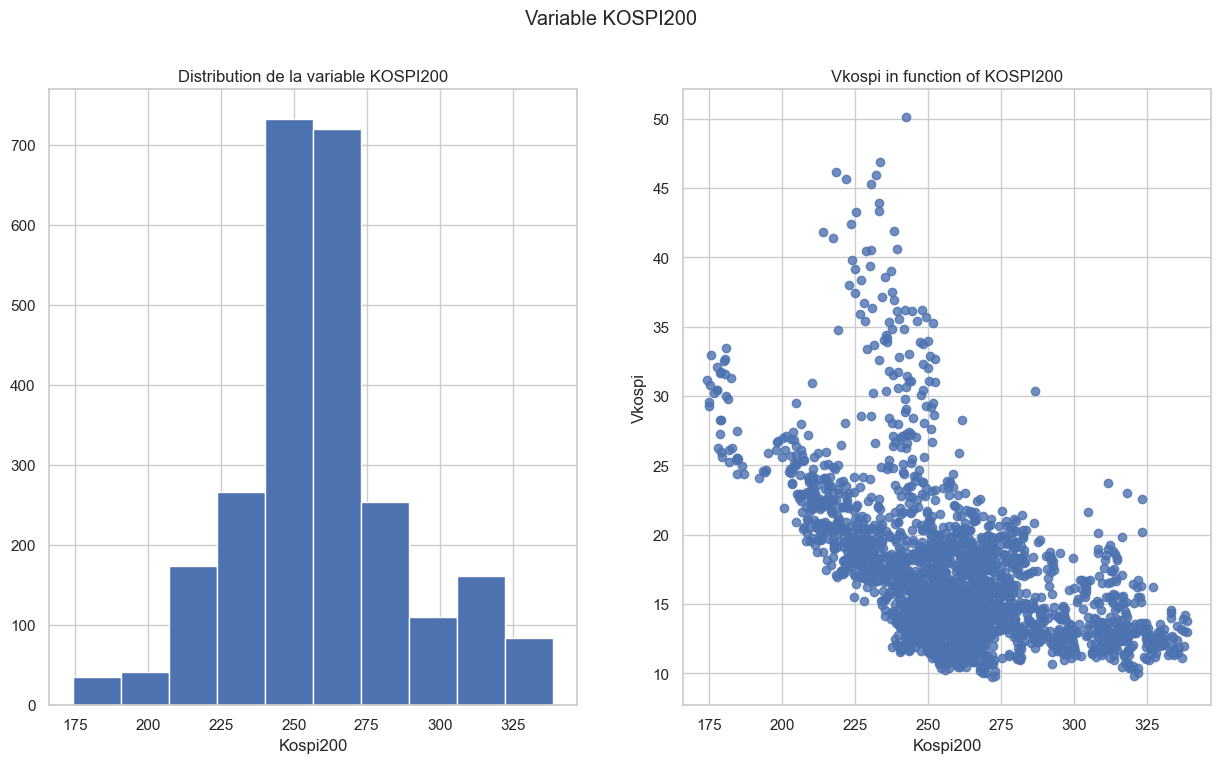

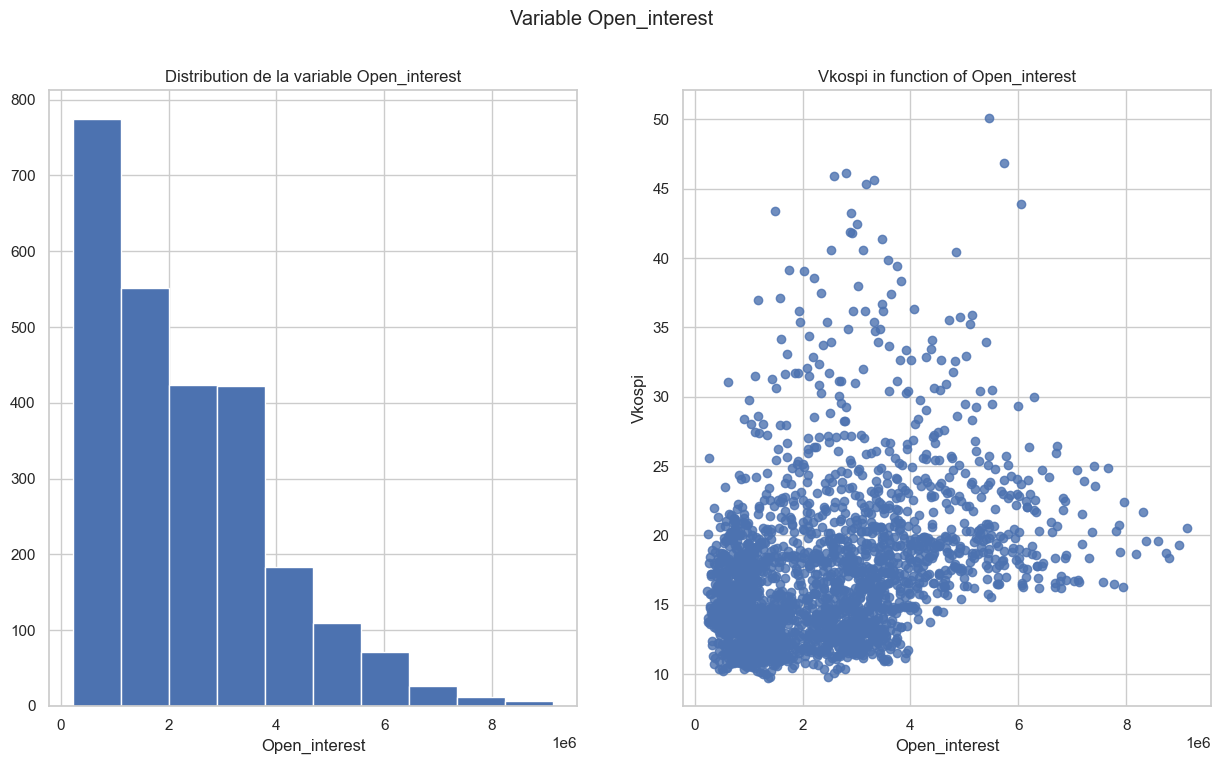

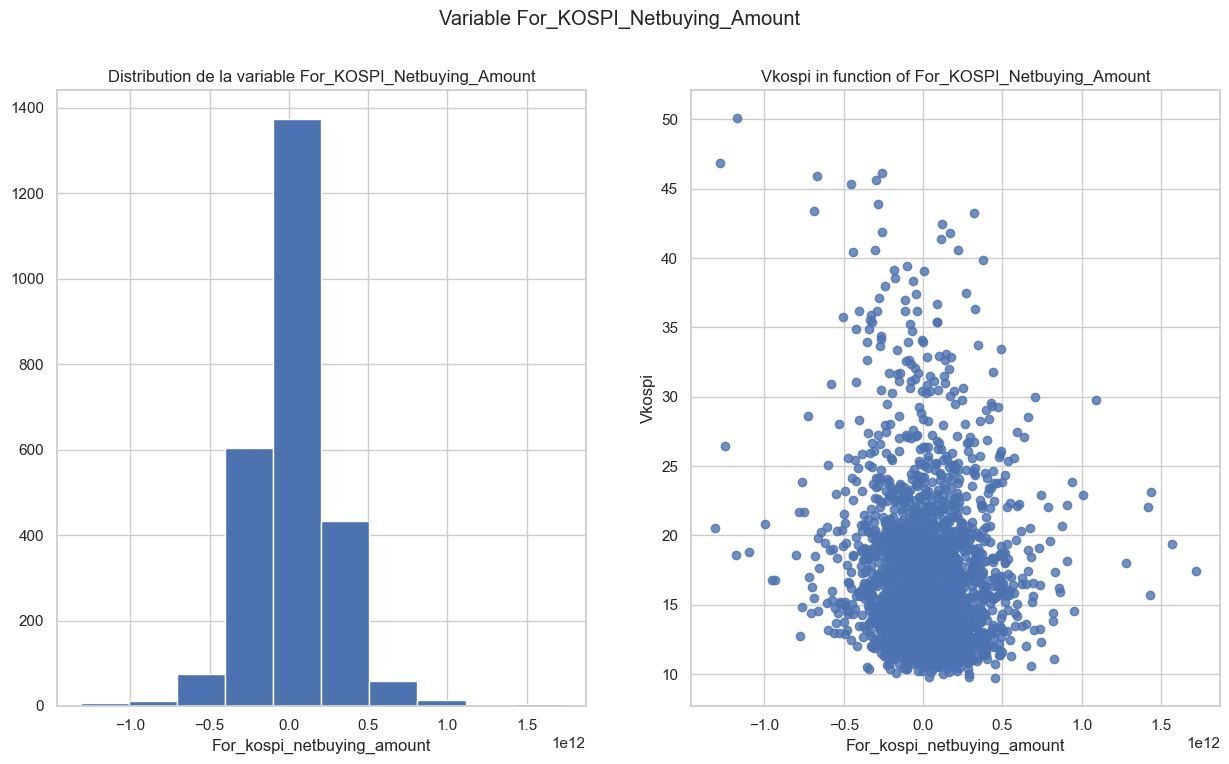

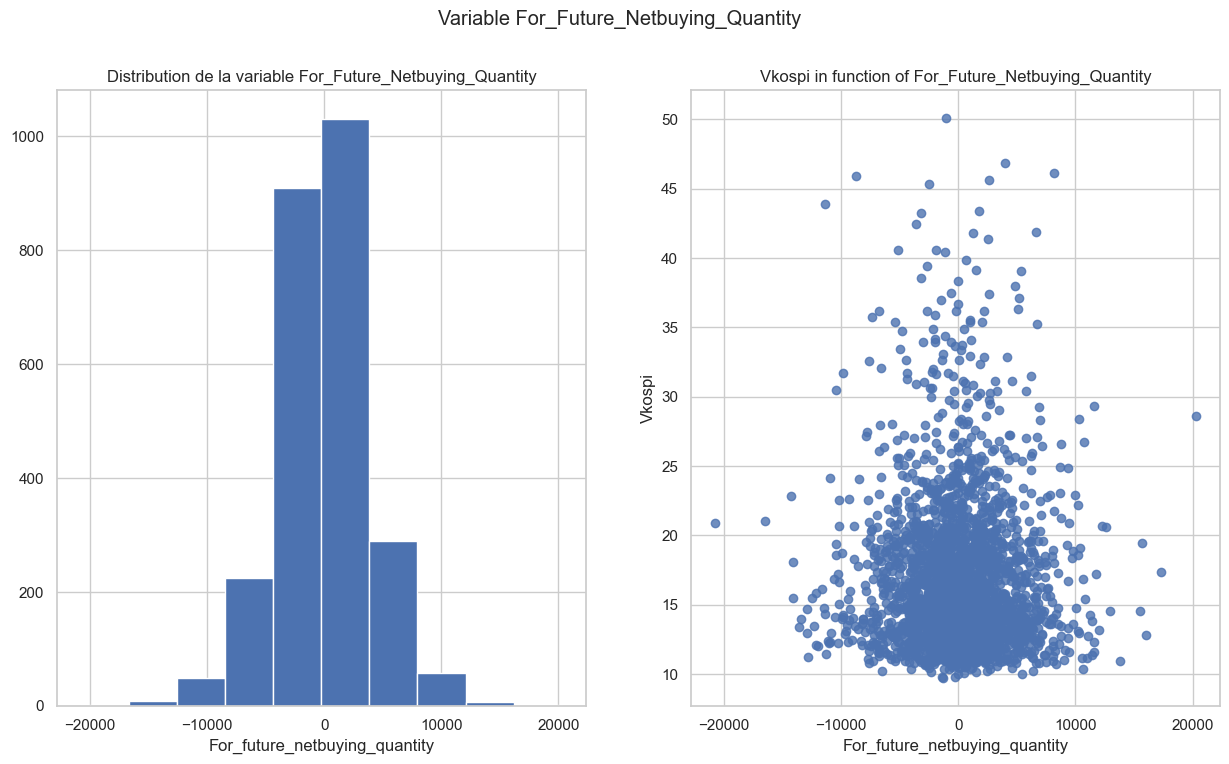

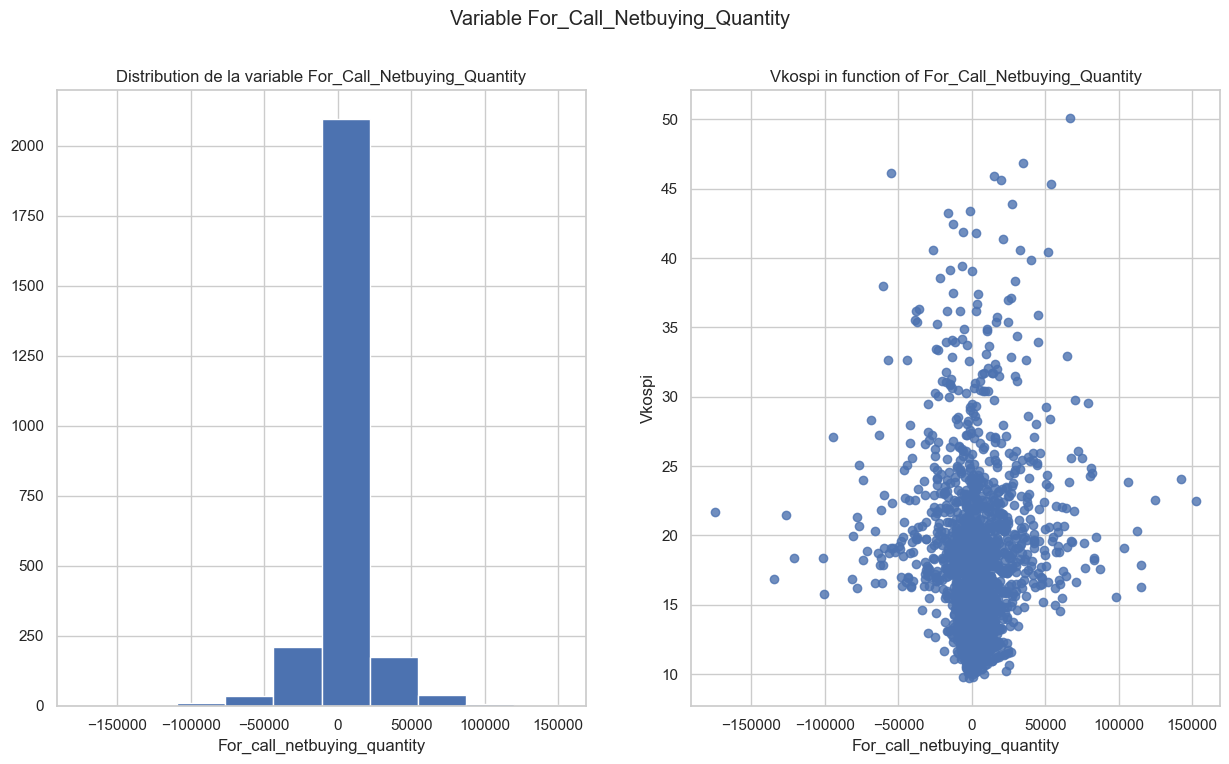

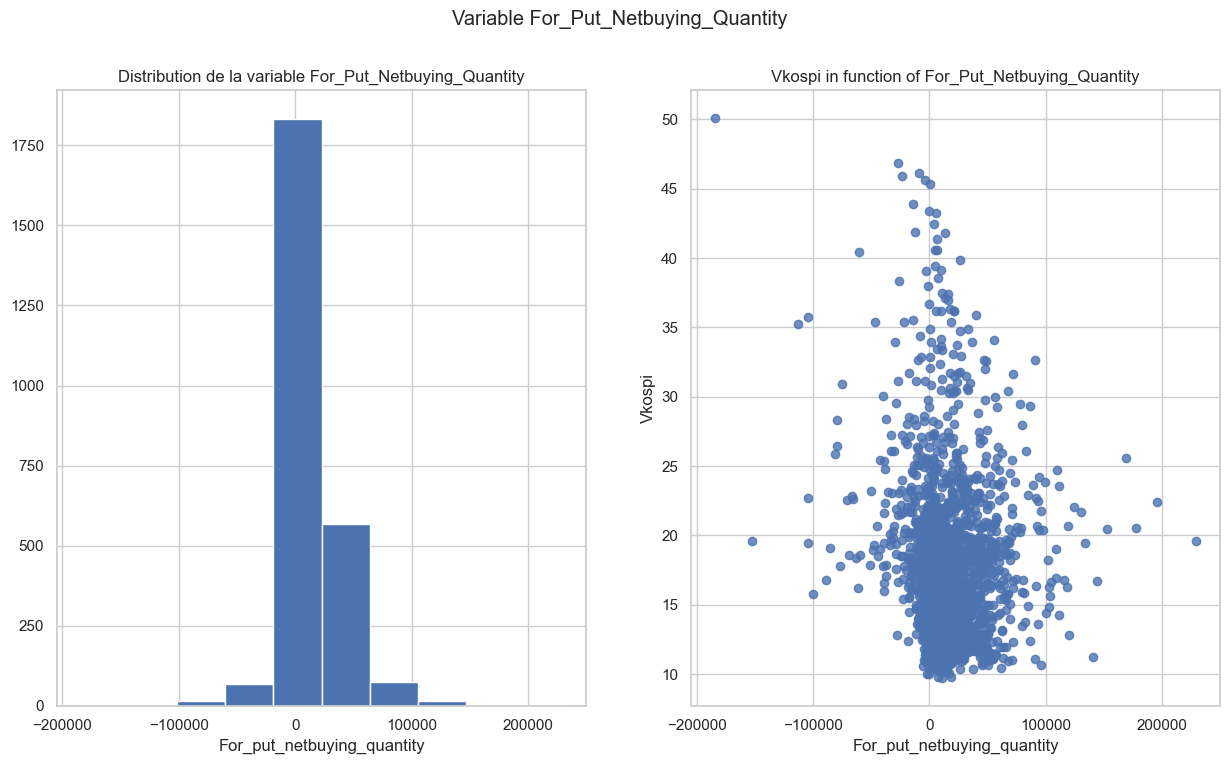

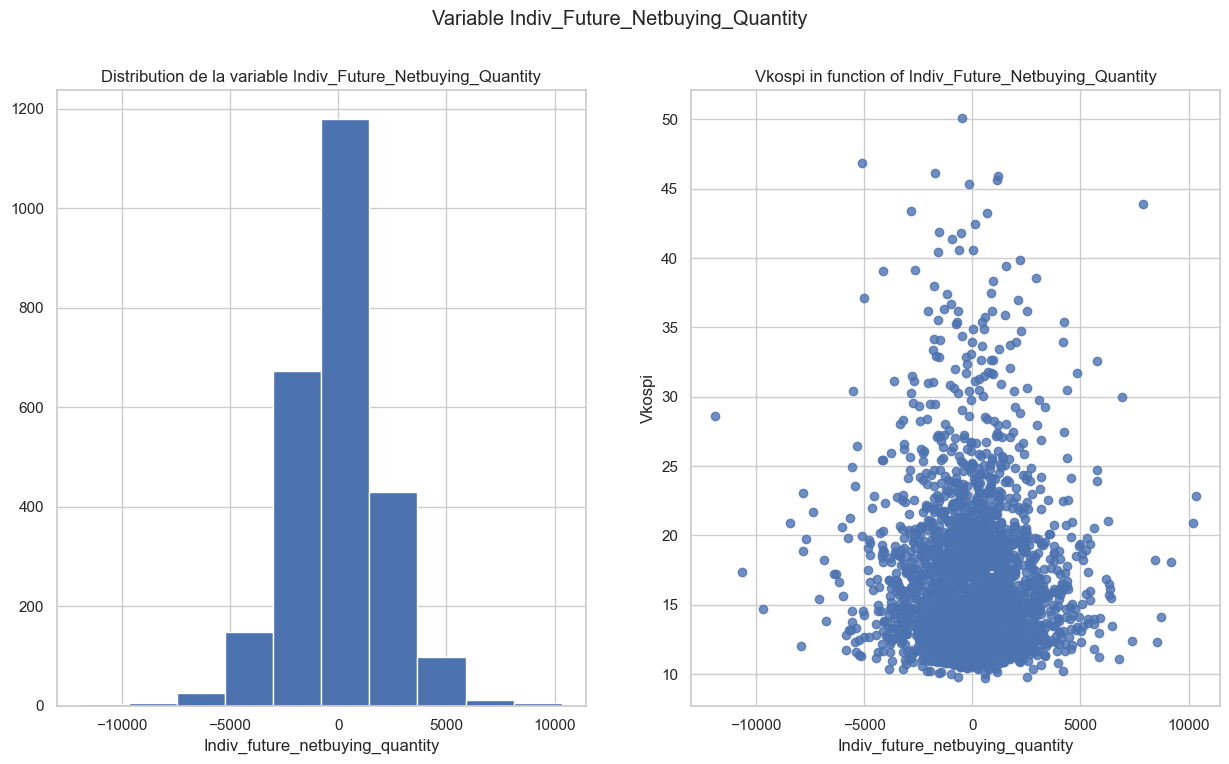

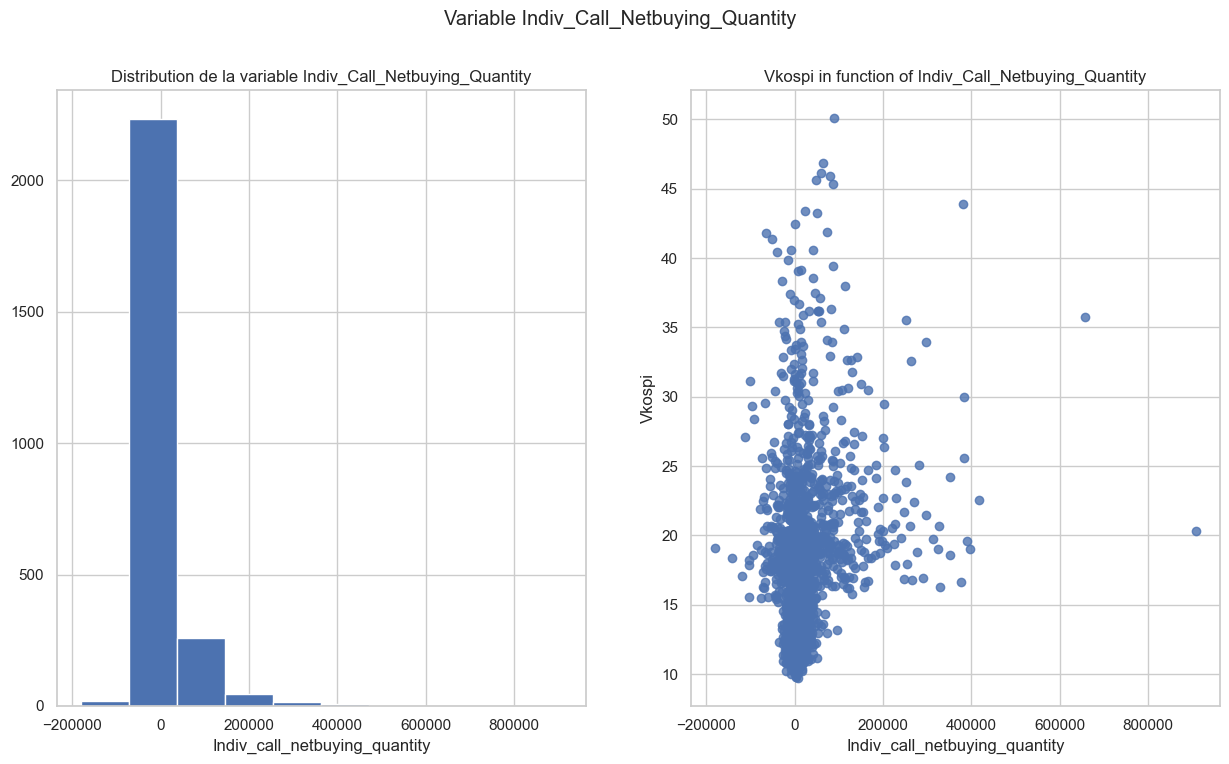

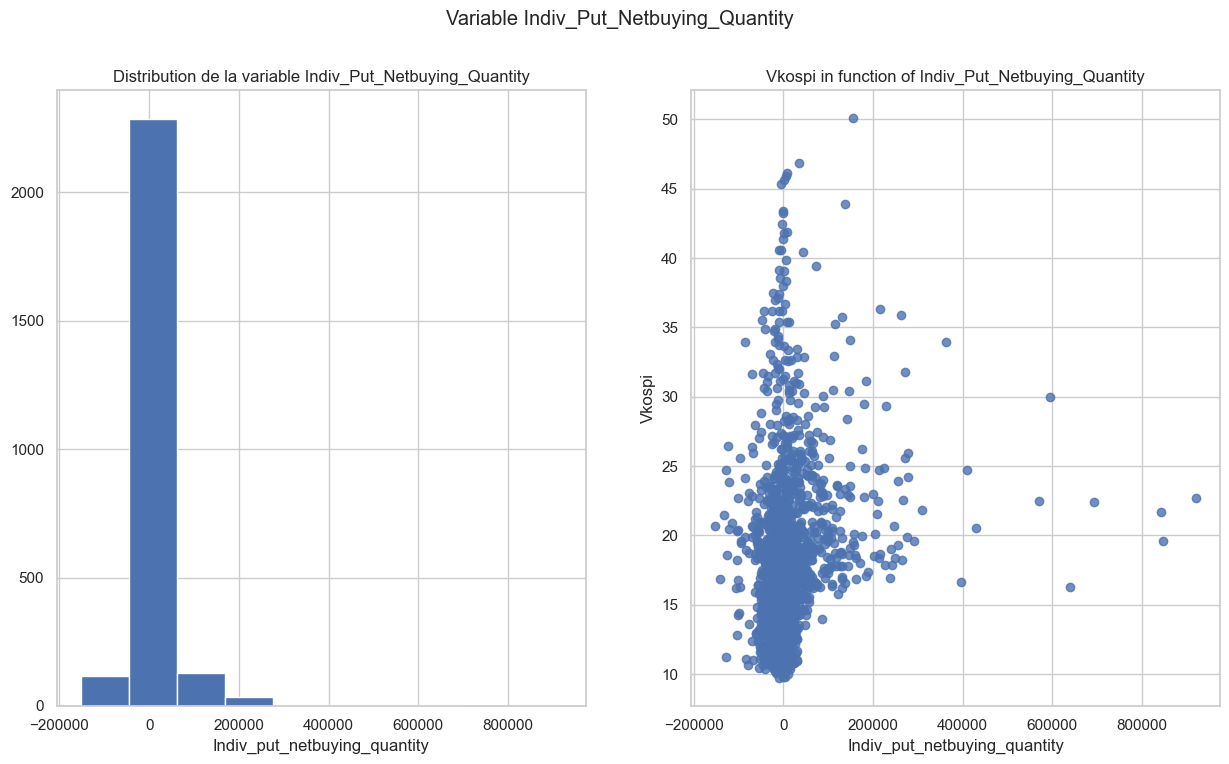

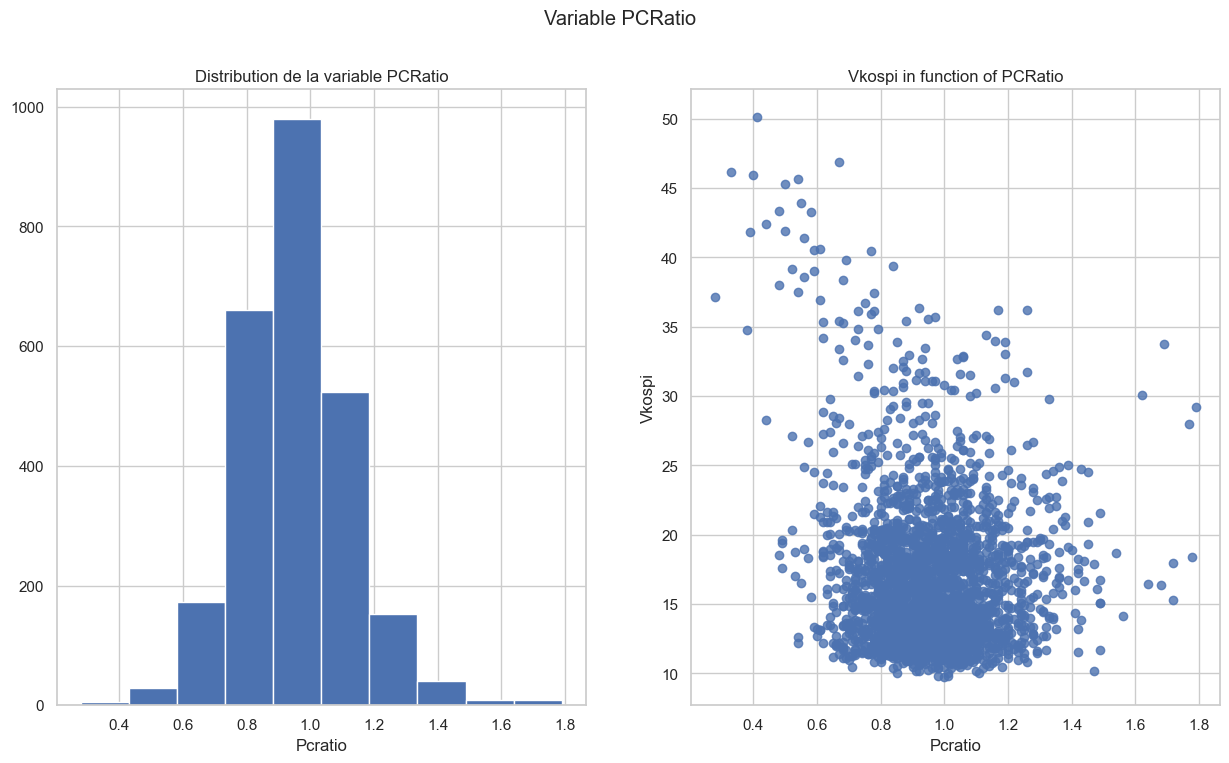

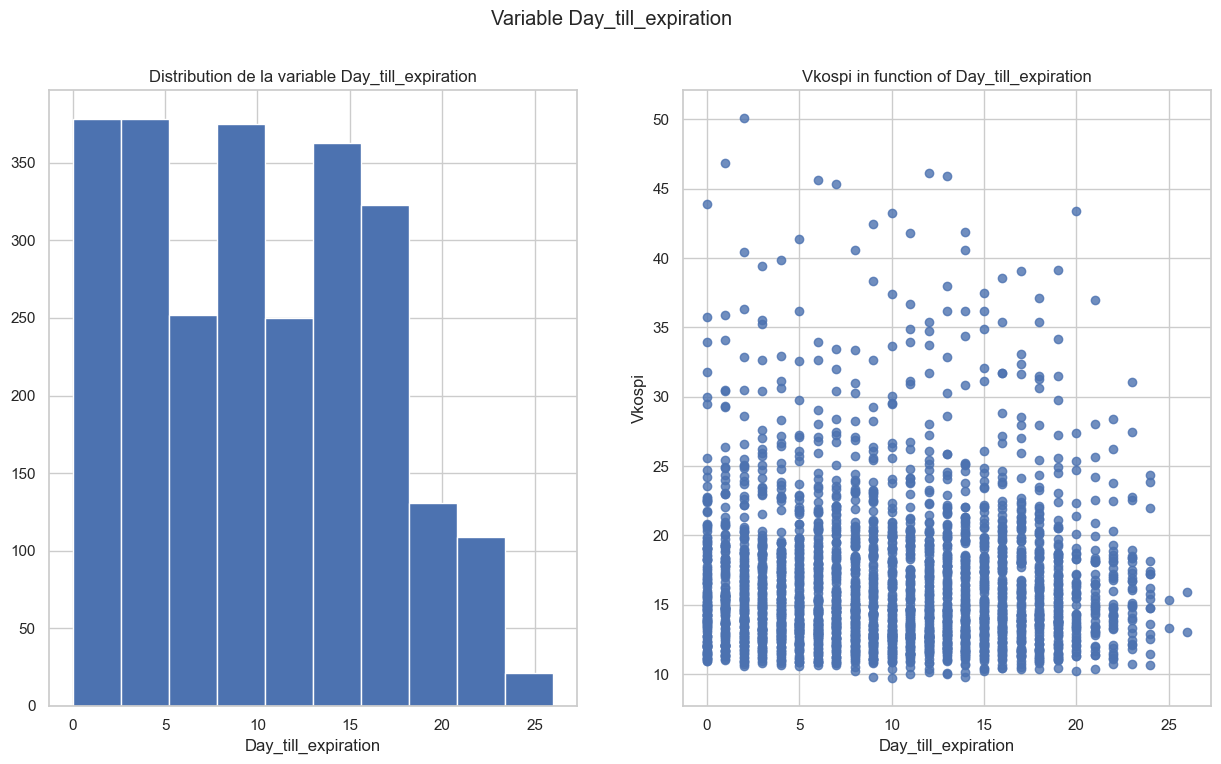

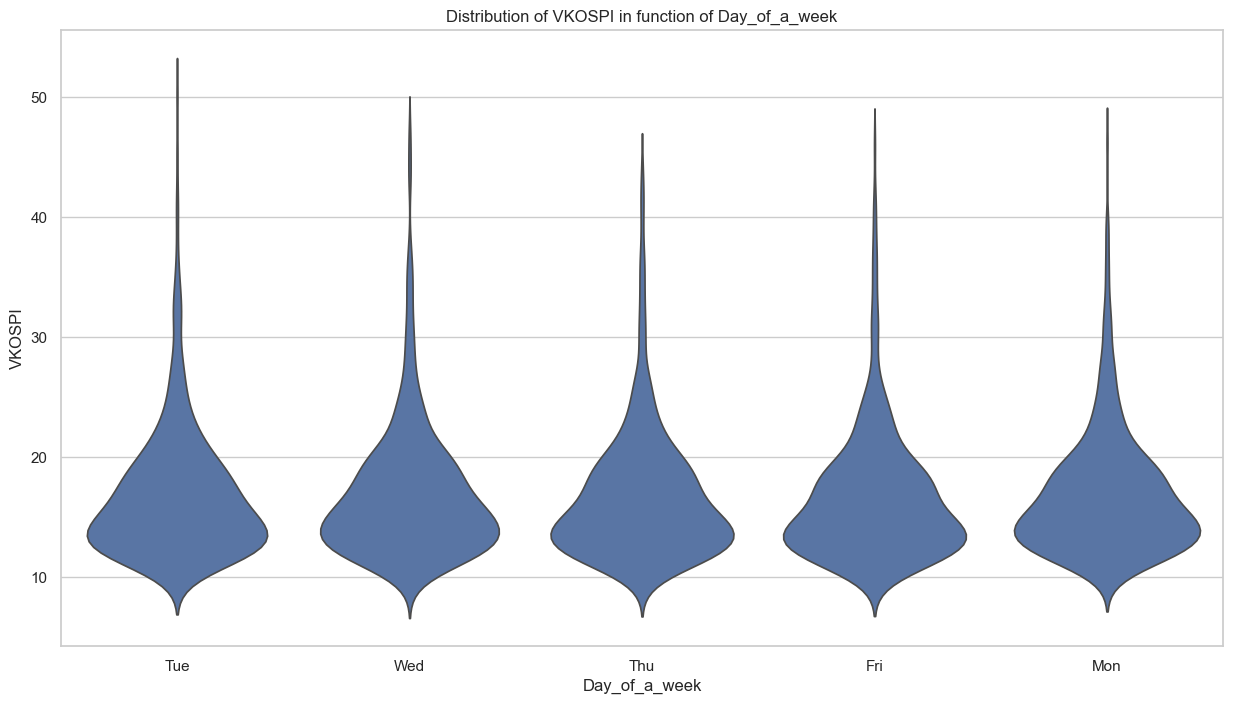

In [ ]:
for column in df.columns:
    if column != "VKOSPI" and column != "Day_of_a_week":
        explore_column(df, column, "VKOSPI")
make_violin_plot("Day_of_a_week")

Au premier vu, "Day_till_expiration", "Day_of_week" l'air explique pas le prix de VKOSPI. Mais pour l'instant, on entraine les modèle quand meme avec ces données là. Et après on va essayer de les supprimer et re-tester les modèles


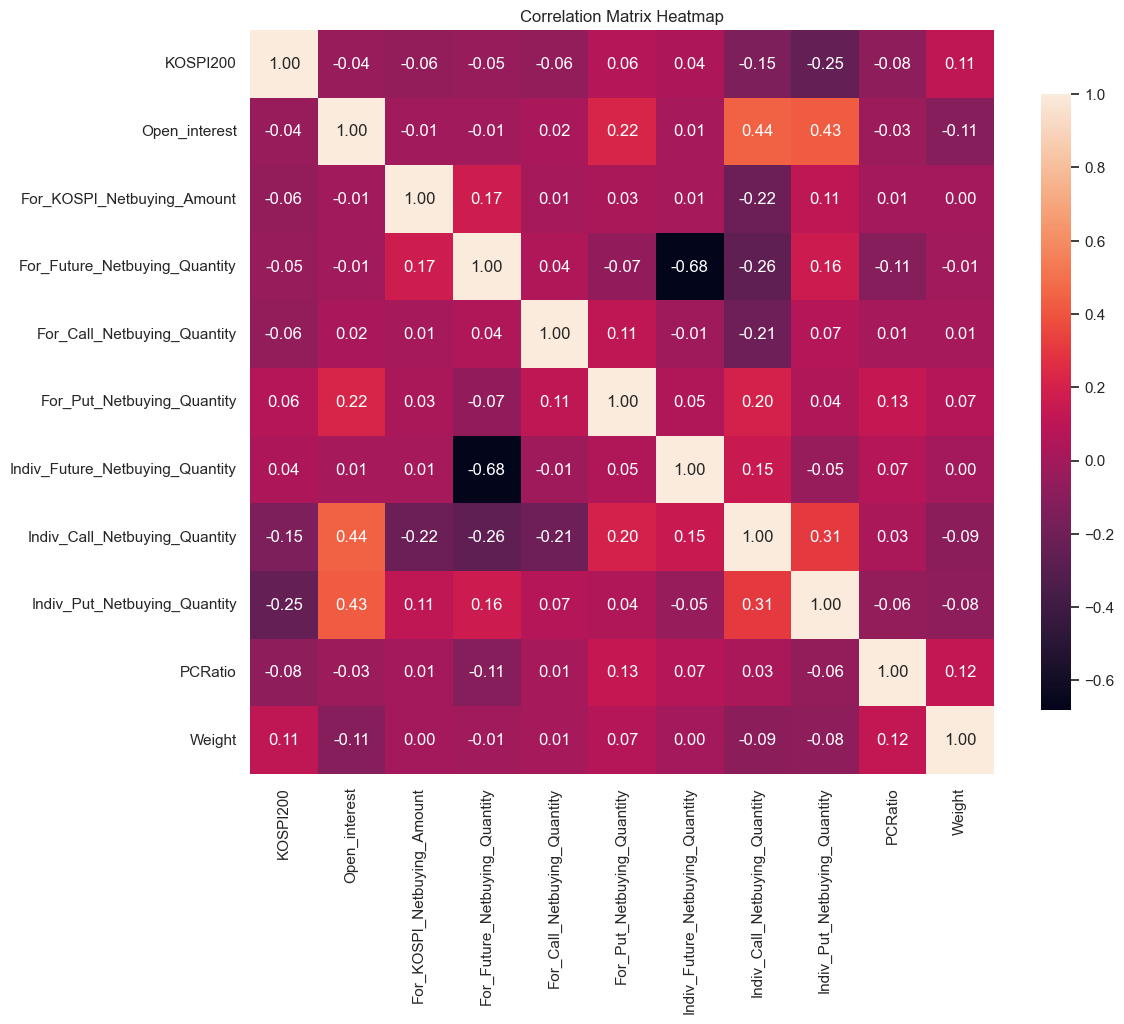

Highly correlated pairs (|correlation| > 0.9):
Series([], dtype: float64)


In [43]:
correlation_matrix = df[predictors].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix, annot=True, fmt=".2f", square=True, cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix Heatmap")
plt.show()

high_corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[
    (high_corr_pairs.abs() > 0.9) & (high_corr_pairs < 1.0)
]

print("Highly correlated pairs (|correlation| > 0.9):")
print(high_corr_pairs)

- En général les features ont de faible corrélations entre eux (**Indiv_Future_Netbuying_Quantity** et **For_Future_Netbuying_Quantity** présentent un coefficient de corrélation de **-0,68**, plus élevé que normal mais c'est pas très grave)


# Basique nettoyage de données


In [31]:
df = pd.get_dummies(df, columns=["Day_of_a_week"])

predictors = df.columns[1:].tolist()
df.head()

,VKOSPI,KOSPI200,Open_interest,For_KOSPI_Netbuying_Amount,For_Future_Netbuying_Quantity,For_Call_Netbuying_Quantity,For_Put_Netbuying_Quantity,Indiv_Future_Netbuying_Quantity,Indiv_Call_Netbuying_Quantity,Indiv_Put_Netbuying_Quantity,PCRatio,Day_till_expiration,Day_of_a_week_Fri,Day_of_a_week_Mon,Day_of_a_week_Thu,Day_of_a_week_Tue,Day_of_a_week_Wed
Date,,,,,,,,,,,,,,,,,
2009-06-02,33.45,180.90,4377777,494000000000,-4953,-24646,6581,1228,-466,31336,0.94,7,False,False,False,True,False
2009-06-03,32.66,180.47,4562690,-89970739025,47,-57128,46851,399,127709,-22259,0.93,6,False,False,False,False,True
2009-06-04,32.56,180.31,4827524,-109000000000,-7666,-2000,48883,5744,262558,10367,0.87,5,False,False,True,False,False
2009-06-05,32.95,175.75,5022921,98420238820,969,64792,27196,-1688,79789,113935,0.89,4,True,False,False,False,False
2009-06-08,30.41,177.77,5293996,43291792420,5797,10995,23123,-5534,97154,146244,0.81,3,False,True,False,False,False


On calibre les modeles à partir de donnés simples. Après on refait avec les parties (mois, horizon, ...) avancée pour comparer


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from lightgbm import LGBMRegressor

RMSE = lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true=y_true, y_pred=y_pred))


def cross_validation_time_series(model, X, y, metric=mean_squared_error, n_splits=10):
    scores = []
    tscv = TimeSeriesSplit(n_splits=n_splits)

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        score = metric(y_test, y_pred)
        scores.append(score)

    return scores

In [42]:
def train_predict_LinearRegression(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Performance du modèle LinearRegression")
    performance(y_test, y_pred)
    return y_pred

def train_predict(
    X, y, name, metric=mean_squared_error, cv=5, min_samples_leaf=5, n_estimators=100
):
    model = RandomForestRegressor(
        min_samples_leaf=min_samples_leaf, n_estimators=500, random_state=42
    )
    model_boosting = LGBMRegressor(
        n_estimators=500, learning_rate=10 ** (-2), random_state=42, verbose=-1
    )

    scores = cross_validation_time_series(model, X, y, metric=metric, n_splits=cv)
    scores_bossting = cross_validation_time_series(
        model_boosting, X, y, metric=metric, n_splits=cv
    )

    mean_scores = np.mean(scores)
    std_scores = np.std(scores)

    mean_scores_boosting = np.mean(scores_bossting)
    std_scores_boosting = np.std(scores_bossting)

    print("%s : %0.4f (+/- %0.4f)" % (name, mean_scores, std_scores))
        print(f"RMSE: {RMSE(y_true, y_pred):.2f}")
    print(f"Moyenne des prix: {y_true.mean():.2f}")
    print(f"R2: {r2_score(y_true, y_pred):.4f}")

    print("Boosting : %0.4f (+/- %0.4f)" % (mean_scores_boosting, std_scores_boosting))


train_predict(
    df[predictors],
    df["VKOSPI"],
    "Basique nettoyage de données",
    metric=RMSE,
    cv=10,
)

Basique nettoyage de données : 3.6781 (+/- 2.5387)
Boosting : 3.6264 (+/- 2.5409)


## Clean outlier


In [34]:
print("Taille avant : %d" % df.shape[0])
df = df.loc[df["Indiv_Call_Netbuying_Quantity"] < 600000,]
print("Taille après : %d" % df.shape[0])

train_predict(
    df[predictors],
    df["VKOSPI"],
    "Après effacer outlier",
    metric=RMSE,
    cv=10,
)

Taille avant : 2580
Taille après : 2578
Après effacer outlier : 4.6042 (+/- 2.5815)


[np.float64(1.96071156348113),
 np.float64(10.81247155755335),
 np.float64(6.927080056985686),
 np.float64(3.3888439467335183),
 np.float64(5.269065321186392),
 np.float64(5.165740163653281),
 np.float64(2.4096777069551414),
 np.float64(5.000449807154037),
 np.float64(2.776555205548994),
 np.float64(2.331503968418198)]

## Drop Day_till_expiration, Day_of_week because it doesn't explain VKOSPI


In [35]:
predictors.remove("Day_till_expiration")
predictors.remove("Day_of_a_week_Fri")
predictors.remove("Day_of_a_week_Mon")
predictors.remove("Day_of_a_week_Thu")
predictors.remove("Day_of_a_week_Tue")
predictors.remove("Day_of_a_week_Wed")



train_predict(
    df[predictors],
    df["VKOSPI"],
    "Après drop les columns explique pas target",
    metric=RMSE,
    cv=10,
)

Après drop les columns explique pas target : 4.5835 (+/- 2.5673)


[np.float64(1.9382605834591757),
 np.float64(10.845961564742241),
 np.float64(6.811059068458579),
 np.float64(3.363767661489293),
 np.float64(5.180290451953378),
 np.float64(5.018289412281897),
 np.float64(2.439789620151394),
 np.float64(5.028759289762991),
 np.float64(2.7921067245666302),
 np.float64(2.416467568195959)]

## Crisis 2011 - 2012


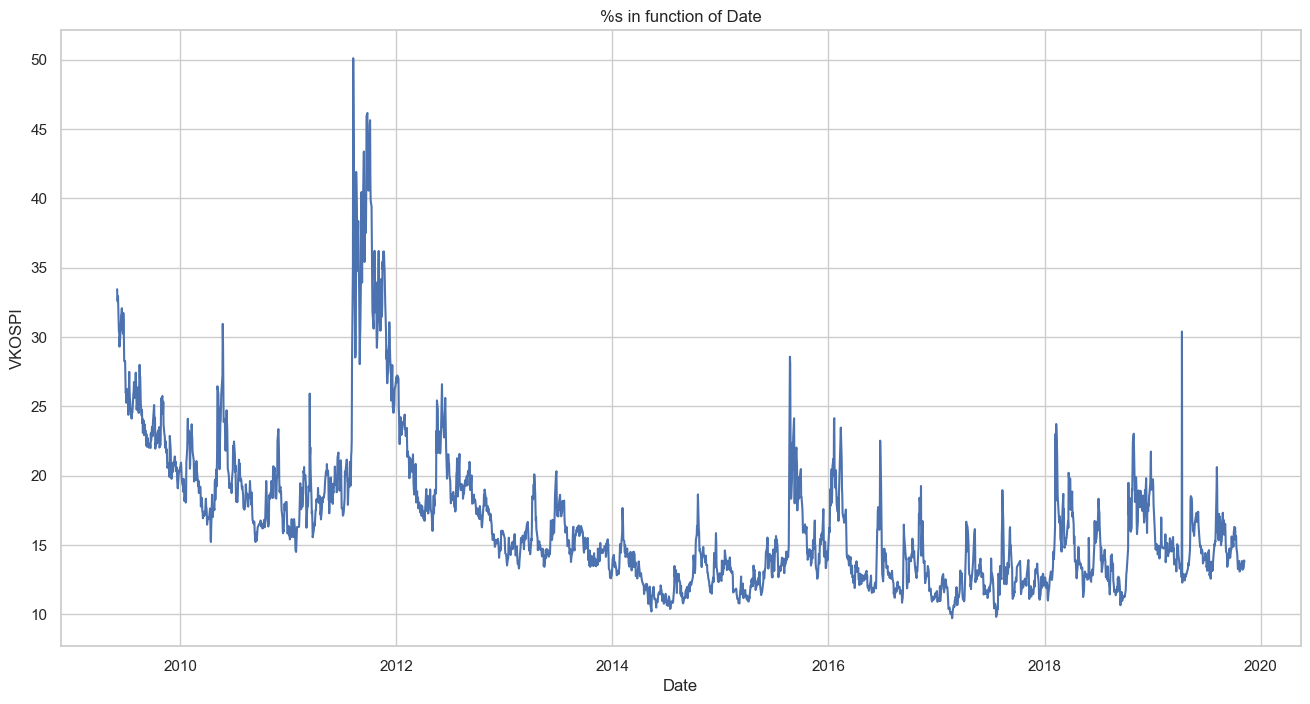

In [36]:
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters


def plot_time_series(df, dateFormatter):
    register_matplotlib_converters()
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.plot(df.index, df["VKOSPI"])
    ax.set(xlabel="Date", ylabel="VKOSPI", title="%s in function of Date")
    date_form = DateFormatter(dateFormatter)
    ax.xaxis.set_major_formatter(date_form)
    plt.show()


plot_time_series(df, "%Y")

VKOSPI peak at 2011 - 2012 tandis que les autres années sont très stable => Euro Debt Crisis ?


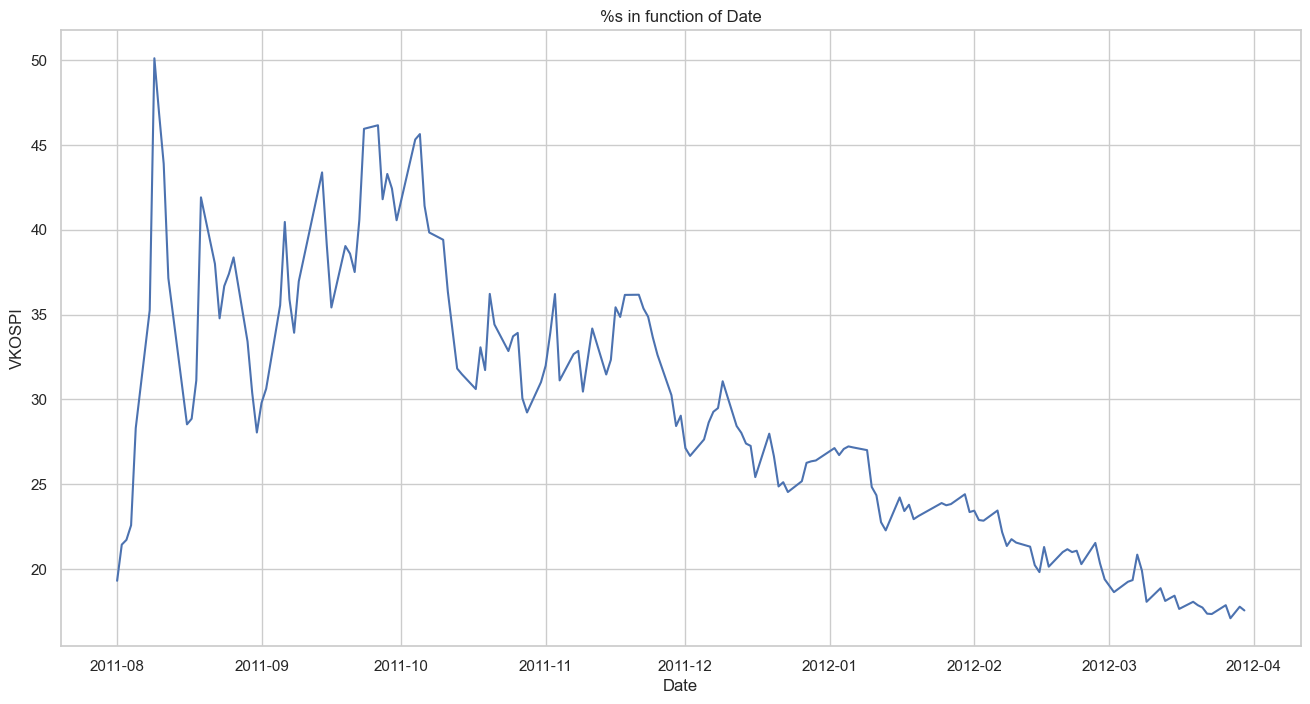

Après mettre moins de poids sur les stress period : 3.6757 (+/- 2.5461)


[np.float64(1.9379494689145476),
 np.float64(10.845877668869067),
 np.float64(2.834102895281276),
 np.float64(2.399333757966715),
 np.float64(3.793962696675518),
 np.float64(3.1330254013095957),
 np.float64(1.9403605385807687),
 np.float64(4.928803765981971),
 np.float64(2.836162313741538),
 np.float64(2.1071355730740158)]

In [37]:
start_date = "2011-08-01"
end_date = "2012-04-01"

# Filter the DataFrame for the specified date range
filtered_df = df.loc[start_date:end_date]

plot_time_series(filtered_df, "%Y-%m")

weights_grid = np.linspace(0.1, 0.9, 10)
score_result = []

df["Weight"] = 1.0
df.loc[start_date:end_date, "Weight"] = 0.5
predictors.append("Weight")

train_predict(
    df[predictors],
    df["VKOSPI"],
    "Après mettre moins de poids sur les stress period",
    metric=RMSE,
    cv=10,
)